In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

```
target = Gender 

- User_ID : 고객 ID
- Product_ID : 제품 ID
- Age : 고객 연령대
- Occupation : 고객 직업
- City_Category : 고객 거주 도시
- Stay_In_Current_City_Years : 현재 도시 거주 기간(년)
- Marital_Status : 결혼 여부
- Product_Category_1 : 구매 제품 분류(대)
- Product_Category_2 : 구매 제품 분류(중)
- Product_Category_3 : 구매 제품 분류(소)
- Purchase : 구매 가격
```

In [7]:
# 데이터 불러오기
data = pd.read_csv('BlackFriday_processed.csv', index_col = 0)

In [9]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


- ID 제외하고 feature의 타입(type)은 int형이 4개, float형이 2개, object형이 5개 입니다. 

In [17]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [18]:
data.describe(include='O')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,4998,4998,4998,4998,4998
unique,1797,2,7,3,5
top,P00265242,M,26-35,B,1
freq,21,3765,1996,2102,1758


In [16]:
for value in data:
    print("######################")
    print(value)
    print("######################")
    print(data[value].value_counts())

######################
User_ID
######################
1002063    12
1005795    12
1001980    11
1004344    11
1005831    10
           ..
1004220     1
1004224     1
1004228     1
1004236     1
1005571     1
Name: User_ID, Length: 2656, dtype: int64
######################
Product_ID
######################
P00265242    21
P00220442    16
P00010742    15
P00114942    15
P00147942    15
             ..
P00330442     1
P00186042     1
P00197342     1
P00072442     1
P00008642     1
Name: Product_ID, Length: 1797, dtype: int64
######################
Gender
######################
M    3765
F    1233
Name: Gender, dtype: int64
######################
Age
######################
26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64
######################
Occupation
######################
4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5  

In [23]:
# Target label 확인
print(f"gender cound: {data['Gender'].count()}")
print(f"gender not null count : {np.round(data['Gender'].count()/len(data)*100, 2)}")

gender cound: 4998
gender not null count : 100.0


([<matplotlib.patches.Wedge at 0x1685774f3a0>,
 [Text(-0.785842545718456, 0.7697087068097492, 'M'),
  Text(0.7858425457184559, -0.7697087068097493, 'F')])

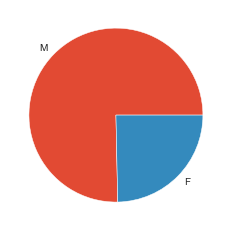

In [66]:
# Target label 분포
target_label_count = data['Gender'].value_counts()
plt.pie(target_label_count, labels = target_label_count.index)

- M(Male)의 수가 F에 비해 약 3배정도 더 많음.

##### Null 값 확인

<AxesSubplot:>

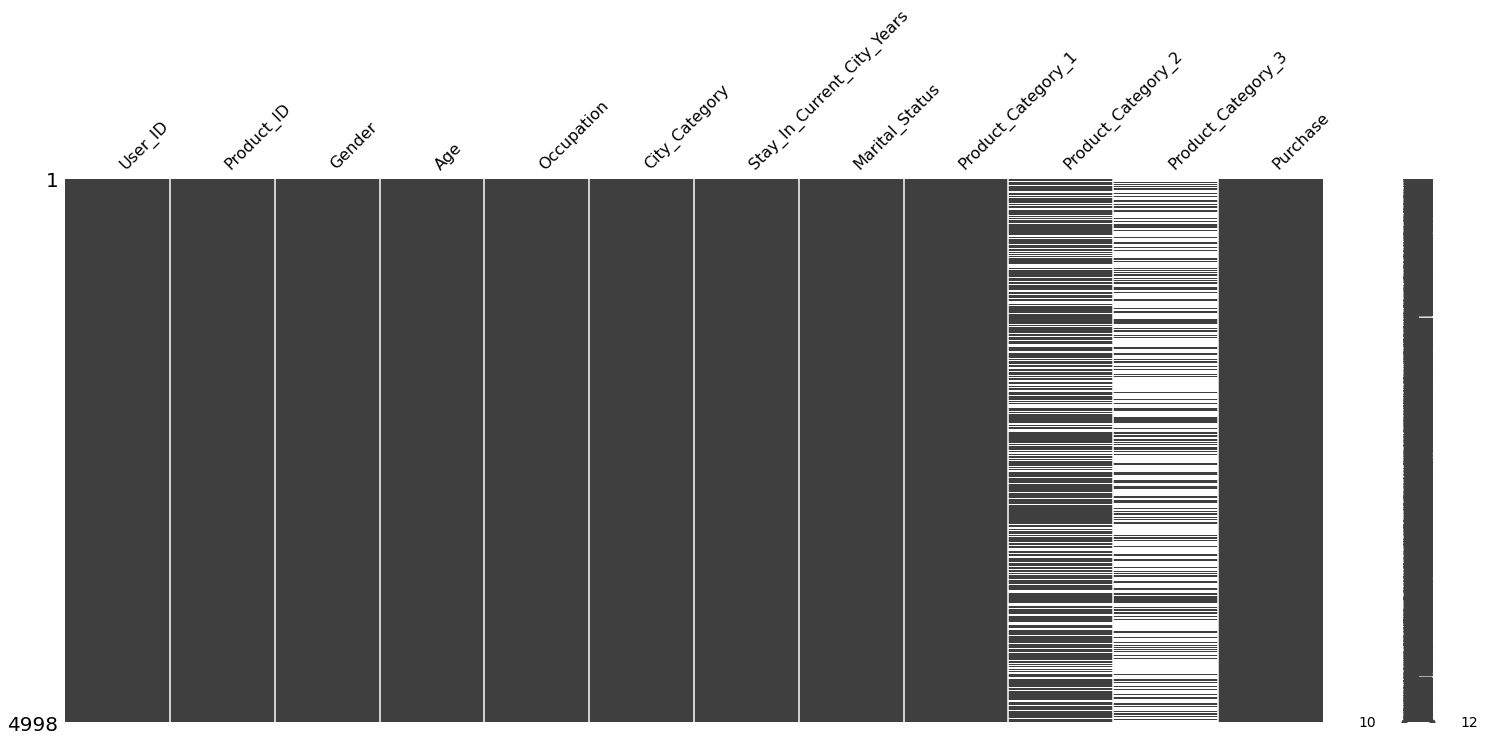

In [32]:
import missingno as msno

msno.matrix(data)

In [33]:
num_of_null = data.isnull().sum()
percent = (num_of_null / data.isnull().count() * 100)
pd.concat([num_of_null, percent], axis = 1, keys=['# of null', 'Percent']).sort_values(by='Percent', ascending=False)

,# of null,Percent
Product_Category_3,3454,69.107643
Product_Category_2,1533,30.672269
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000


- Product_Category_3 변수의 경우에는 약 70%가 null값으로 구성되어있어 유의미한 정보를 뽑아내기는 힘들다고 판단 => 제거

In [34]:
data = data.drop("Product_Category_3", axis=1)

In [38]:
# Product_Category_2 변수 살펴보기
data['Product_Category_2'].value_counts()

8.0     588
14.0    496
2.0     448
16.0    392
15.0    345
5.0     258
4.0     246
6.0     148
17.0    132
11.0    110
13.0    102
9.0      65
12.0     40
3.0      35
10.0     30
18.0     23
7.0       7
Name: Product_Category_2, dtype: int64

In [39]:
data['Product_Category_2'].median()

9.0

In [40]:
data['Product_Category_2'].mean()

9.773737373737374

In [41]:
data['Product_Category_2'].mode()

0    8.0
dtype: float64

###### 해당 데이터가 무엇을 의미하는지와 숫자들의 의미가 불분명하여 자가적인 판단 필요 => 중앙값인 9로 결측치를 채우기로 결정.

In [44]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(9.)

In [45]:
num_of_null = data.isnull().sum()
percent = (num_of_null / data.isnull().count() * 100)
pd.concat([num_of_null, percent], axis = 1, keys=['# of null', 'Percent']).sort_values(by='Percent', ascending=False)

,# of null,Percent
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


- Null 데이터 제거

### EDA

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          4998 non-null   float64
 10  Purchase                    4998 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 468.6+ KB


- 데이터를 확인해보았을때 실제로 숫자로서의 의미를 가지는건 "Purchase" 변수뿐임.

###### 나머지 Occupation, Marital_Status, Product_Category_1, Product_Category_2는 범주화(Object)

In [49]:
obj_columns = ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']

for col in obj_columns:
    data[col] = data[col].astype(str)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     4998 non-null   int64 
 1   Product_ID                  4998 non-null   object
 2   Gender                      4998 non-null   object
 3   Age                         4998 non-null   object
 4   Occupation                  4998 non-null   object
 5   City_Category               4998 non-null   object
 6   Stay_In_Current_City_Years  4998 non-null   object
 7   Marital_Status              4998 non-null   object
 8   Product_Category_1          4998 non-null   object
 9   Product_Category_2          4998 non-null   object
 10  Purchase                    4998 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 468.6+ KB


- Type 변환 완료

#### 수치형 변수

In [53]:
# 통계량 구하기 함수
def get_min_max_avg(df, feature):
    print('Feature: ', feature)
    print('########################################')
    print('The max value is:',df[feature].max())
    print('The min value is:',df[feature].min())
    print('The average value is:',df[feature].mean())
    print('The median value is:',df[feature].median())
    

# histograme 그리기 함수    
def plot_hist(df, feature, max_ylim, bins=10):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.hist(df[feature], bins=bins)
    ax.set_ylim(0, max_ylim)
    ax.set_title(feature+' distribution (bins='+str(bins)+')')
    plt.show()

##### 1) Purchase

In [54]:
get_min_max_avg(data, 'Purchase')

Feature:  Purchase
########################################
The max value is: 23913
The min value is: 13
The average value is: 9234.655462184874
The median value is: 8049.0


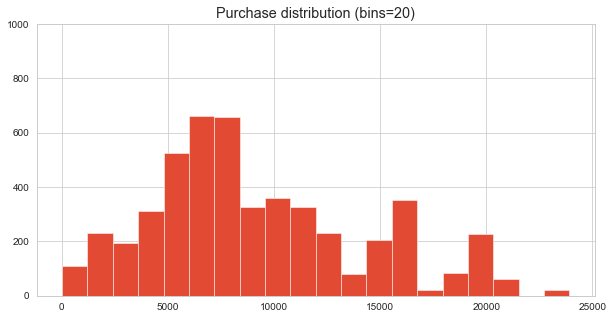

In [68]:
plot_hist(data, 'Purchase', 1000, 20)

- Purchase의 분포는 대략 오른쪽으로 꼬리가 늘어진 분포이며 데이터의 의미나 값을 봤을때 최댓값은 이상치로 보여지진 않음.

###### 구매에 따른 성별 (Purchase vs Gender)

In [75]:
# 시각화를 위한 라이브러리 설치 & 로드
# !pip install plotnine
from plotnine import *

<Figure size 432x288 with 0 Axes>

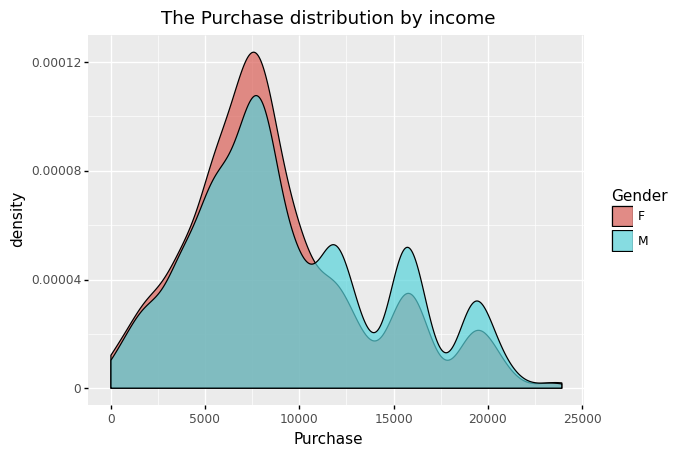

<ggplot: (96731784729)>

In [76]:
fig = plt.figure()

ggplot(data, aes(x='Purchase', fill='Gender')) + geom_density(alpha=0.7) + ggtitle("The Purchase distribution by income")

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

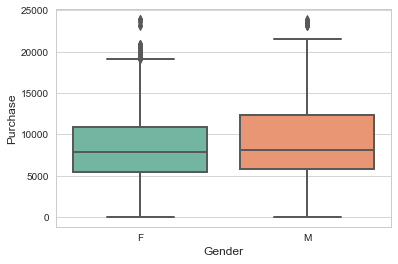

In [79]:
sns.boxplot(x='Gender', y='Purchase', data = data, palette='Set2',linewidth=2)

- 성별에 따른 Purchase의 분포가 거의 일치함.
- 성별을 분류함에 있어서 유의미한 변수로 보여지지 않음.

#### 범주형 변수

In [84]:
for col in data.columns:
    if data[col].dtype == 'object':
        all_categories = data[col].unique()
        print(f"Column {col} has {len(all_categories)} unique categories")
        print("The Categories are " + ", ".join(all_categories))
        print()

Column Product_ID has 1797 unique categories
The Categories are P00046042, P00347742, P00048942, P00145242, P00106742, P00051642, P00000242, P00117942, P00200142, P00319342, P00278242, P00350942, P00100642, P00195542, P00001342, P00086342, P00276642, P00183942, P00318642, P00016442, P00163242, P00002742, P00020342, P00230442, P00137442, P00087042, P00370293, P00069242, P00188742, P00065242, P00034742, P00251242, P00111842, P00343042, P00085942, P00185342, P00171642, P00238542, P00025542, P00124842, P00273442, P00157542, P00243242, P00174442, P00174042, P00145442, P00221842, P00108942, P00173542, P00052842, P00035942, P00302042, P00113142, P00186242, P00111442, P00249542, P00058042, P00289842, P00044242, P00216342, P00003242, P00223642, P00036842, P00111542, P00351342, P00249042, P00255542, P00082842, P00001142, P00258742, P00158342, P00271742, P00350142, P00212842, P00145042, P00035842, P00092442, P00118742, P00251542, P00214242, P00213742, P00305042, P00255942, P00294442, P00103042, P

###### 각 범주형 변수들의 값 중에서 ?나 표기가 안맞는 관측치는 없어보임.

In [83]:
for col in data.columns:
    if data[col].dtype == 'object':
        categories = data[col].unique()
        print(f"The number of unique values in [{col}]: {len(categories)}")

The number of unique values in [Product_ID]: 1797
The number of unique values in [Gender]: 2
The number of unique values in [Age]: 7
The number of unique values in [Occupation]: 21
The number of unique values in [City_Category]: 3
The number of unique values in [Stay_In_Current_City_Years]: 5
The number of unique values in [Marital_Status]: 2
The number of unique values in [Product_Category_1]: 20
The number of unique values in [Product_Category_2]: 17


###### Product_ID의 unique 종류가 너무 많은듯 함.

In [89]:
def get_unique_values(df, feature):
    all_categories = data[feature].unique()
    print(f'Column "{feature}" has {len(all_categories)} unique categroies')
    print('------------------------------------------')
    print('\n'.join(all_categories))

##### 1) Product_ID

- 범주가 너무 많으므로 P00# 꼴로 데이터 축소

In [85]:
data['Product_ID'] = data['Product_ID'].map(lambda x:x[:4])

In [90]:
get_unique_values(data, 'Product_ID')

Column "Product_ID" has 5 unique categroies
------------------------------------------
P000
P003
P001
P002
P009


###### 5개의 범주로 줄어들음.

<AxesSubplot:xlabel='Product_ID', ylabel='count'>

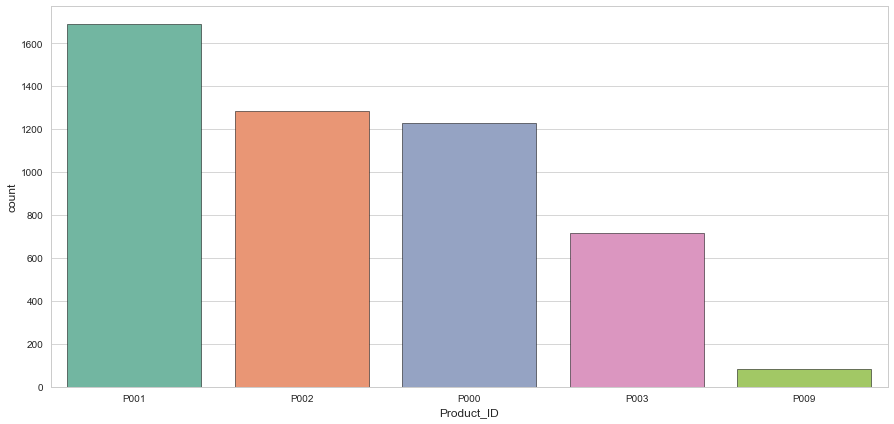

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
col = 'Product_ID'
value_counts = data[col].value_counts()
sns.countplot(x=col, data=data, palette='Set2', edgecolor='black', order=value_counts.index)

- P001에 해당하는 Product_ID가 가장 많음.

##### 상품 ID별 성별 보기 (Product ID vs Gender)

<AxesSubplot:xlabel='Product_ID', ylabel='count'>

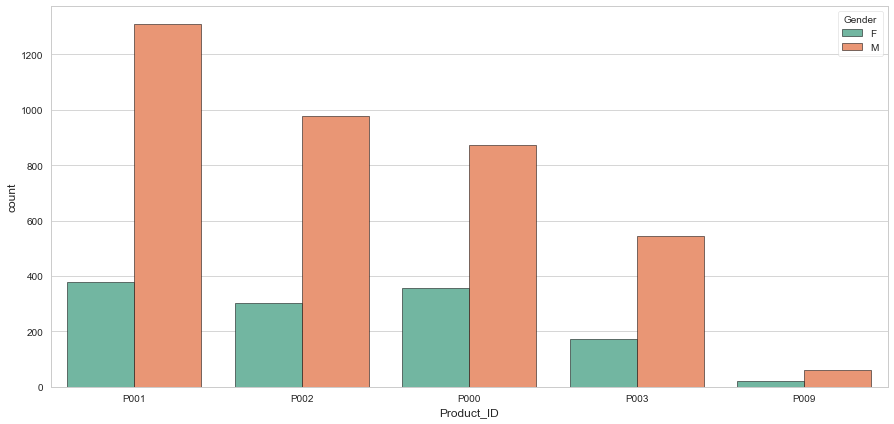

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.countplot(x=col, data=data, hue='Gender', palette='Set2', edgecolor='black', order=value_counts.index)

###### 모든 상품군에서 M의 구매가 더 많았음.

##### 2) Age

In [95]:
get_unique_values(data, 'Age')

Column "Age" has 7 unique categroies
------------------------------------------
0-17
18-25
26-35
36-45
46-50
51-55
55+


<AxesSubplot:xlabel='Age', ylabel='count'>

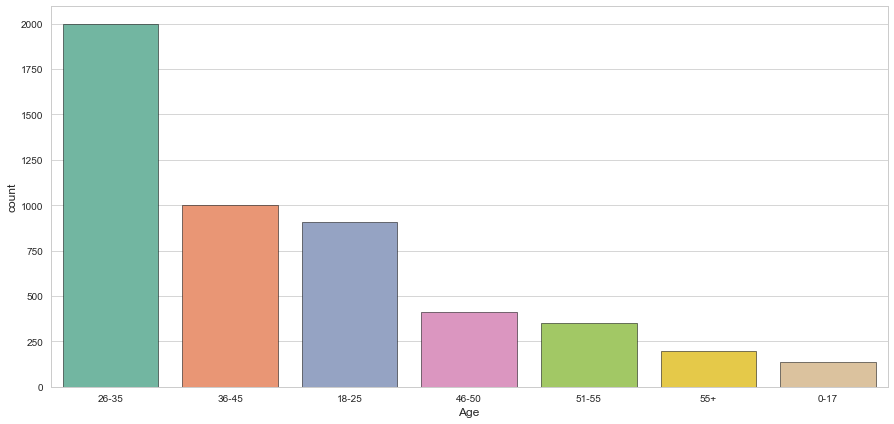

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
col = 'Age'
value_counts = data[col].value_counts()
sns.countplot(x=col, data=data, palette='Set2', edgecolor='black', order=value_counts.index)

- 구매 연령층은 26-35의 20\~30대 연령이 가장 많음.

\- 다음으로 36\~45, 18\~25이 뒤따르는데, 경제활동 연령층으로 보여짐.

##### 연령별 성별 보기 (Age vs Gender)

<AxesSubplot:xlabel='Age', ylabel='count'>

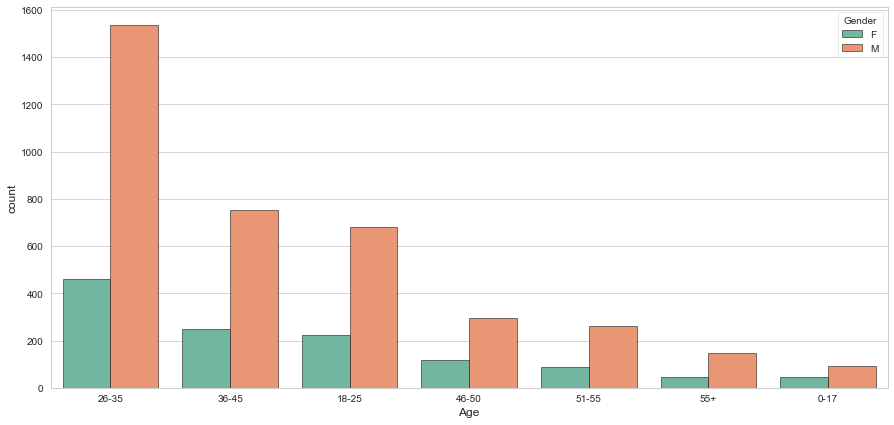

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.countplot(x=col, data=data, hue='Gender', palette='Set2', edgecolor='black', order=value_counts.index)

###### 모든 연령대에서 M의 구매가 더 많았음.

##### 3) Occupation

In [99]:
get_unique_values(data, 'Occupation')

Column "Occupation" has 21 unique categroies
------------------------------------------
10
2
0
19
1
7
12
8
4
9
3
20
15
14
16
17
5
6
11
18
13


<AxesSubplot:xlabel='Occupation', ylabel='count'>

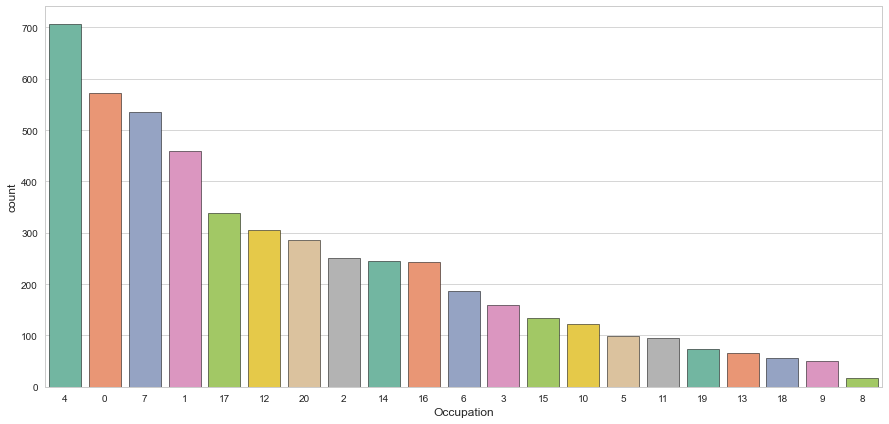

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
col = 'Occupation'
value_counts = data[col].value_counts()
sns.countplot(x=col, data=data, palette='Set2', edgecolor='black', order=value_counts.index)

- 해당 데이터는 숫자로 구성되어 있어서 의미파악이 힘듦.

##### 직업별 성별 보기 (Occupation vs Gender)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

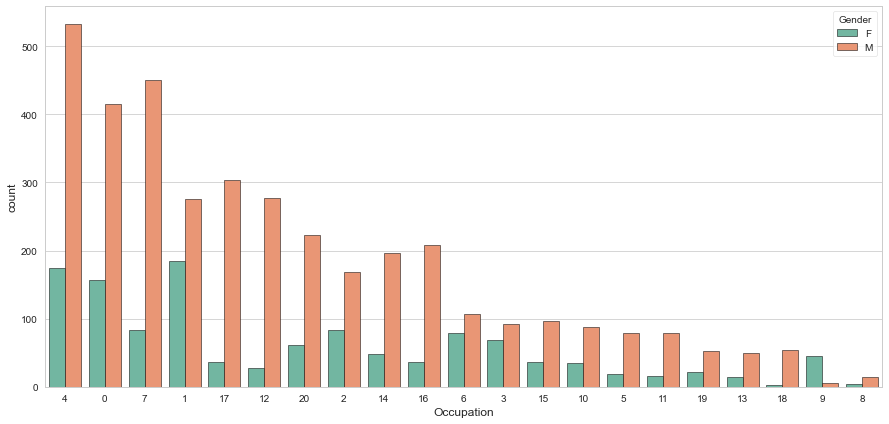

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.countplot(x=col, data=data, hue='Gender', palette='Set2', edgecolor='black', order=value_counts.index)

###### 거의 모든 직업군에서 M의 데이터 개수가 더 많았지만 9번 occupation의 경우 F의 개수가 더 많았음.

##### 4) City_Category

In [102]:
get_unique_values(data, 'City_Category')

Column "City_Category" has 3 unique categroies
------------------------------------------
A
B
C


<AxesSubplot:xlabel='City_Category', ylabel='count'>

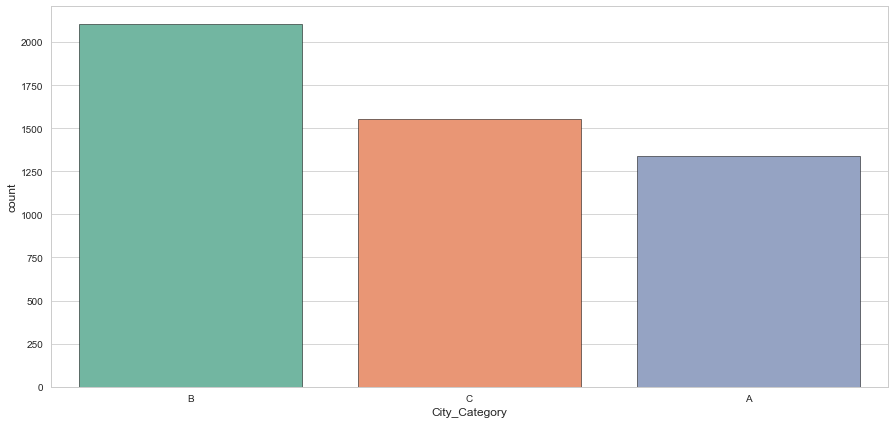

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
col = 'City_Category'
value_counts = data[col].value_counts()
sns.countplot(x=col, data=data, palette='Set2', edgecolor='black', order=value_counts.index)

- B 지역의 관측 데이터가 가장 많음. 다음은 C 그리고 A

##### 도시별 성별 보기 (City_Category vs Gender)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

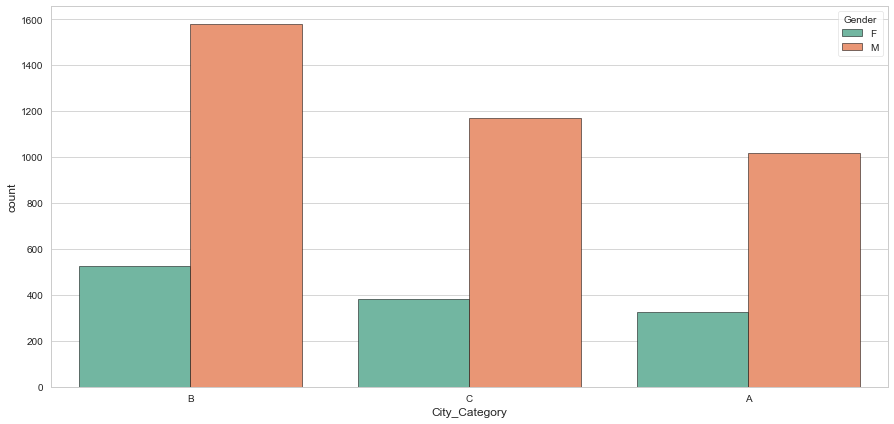

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.countplot(x=col, data=data, hue='Gender', palette='Set2', edgecolor='black', order=value_counts.index)

###### 모든 지역에서 M의 소비가 더 많았음.

##### 5) Stay_In_Current_City_Years

In [105]:
get_unique_values(data, 'Stay_In_Current_City_Years')

Column "Stay_In_Current_City_Years" has 5 unique categroies
------------------------------------------
3
1
2
4+
0


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

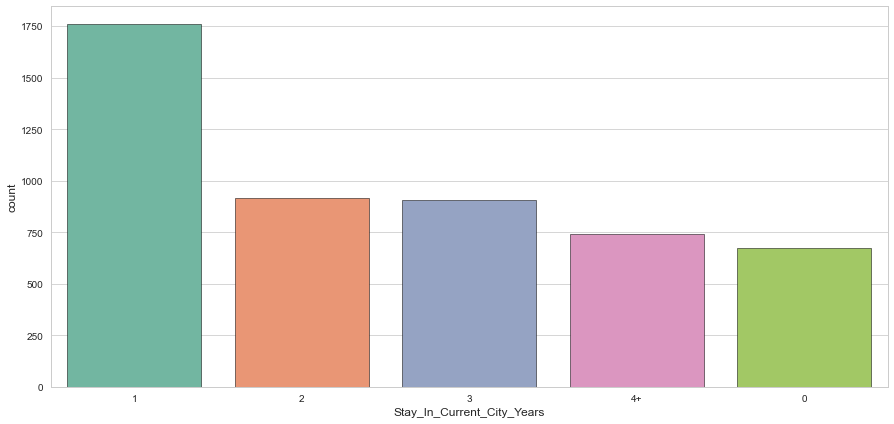

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
col = 'Stay_In_Current_City_Years'
value_counts = data[col].value_counts()
sns.countplot(x=col, data=data, palette='Set2', edgecolor='black', order=value_counts.index)

- 그 지역에 산지 얼마 안된(1년차)에 가장 많은 소비를 하는것으로 보임.
- 4+(4년 이상 거주) 에는 소비를 많이 하지 않음.

##### 거주기간별 성별 보기 (Stay_In_Current_City_Years vs Gender)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

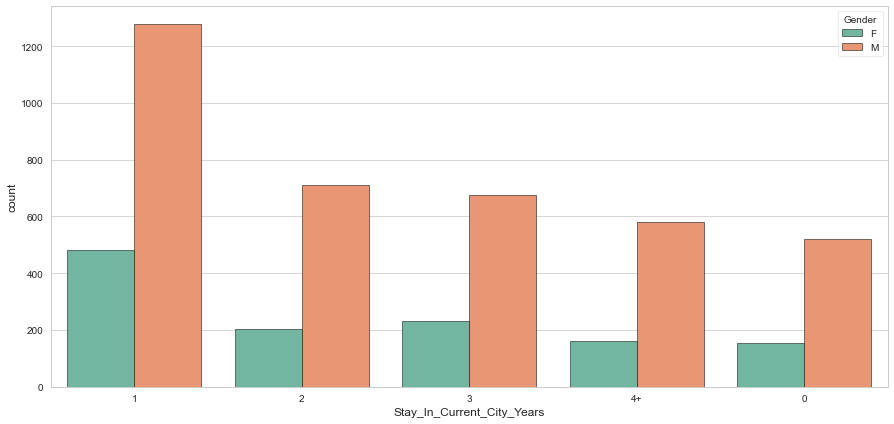

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.countplot(x=col, data=data, hue='Gender', palette='Set2', edgecolor='black', order=value_counts.index)

###### 모든 기간 동안 남성의 소비량이 더 많음.

##### 6) Marital_Status

In [108]:
get_unique_values(data, 'Marital_Status')

Column "Marital_Status" has 2 unique categroies
------------------------------------------
0
1


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

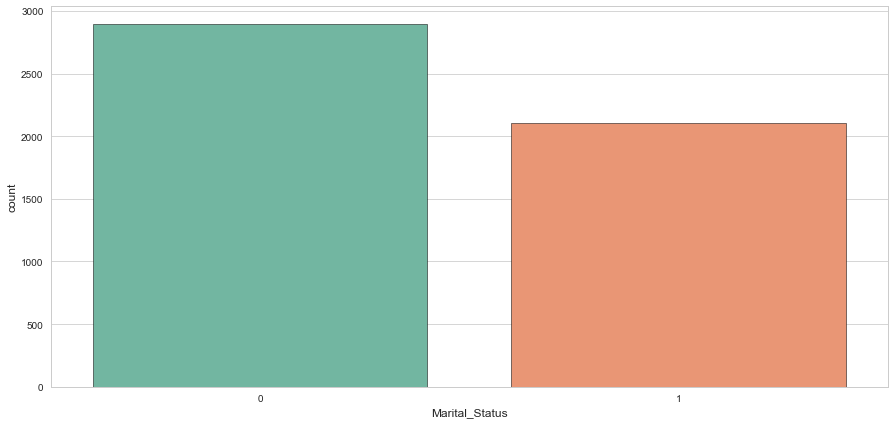

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
col = 'Marital_Status'
value_counts = data[col].value_counts()
sns.countplot(x=col, data=data, palette='Set2', edgecolor='black', order=value_counts.index)

- 결혼을 하지 않은 사람(0)이 Black Friday를 더 즐기는것으로 보여짐.

##### 결혼유무별 성별 보기 (Marital_Status vs Gender)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

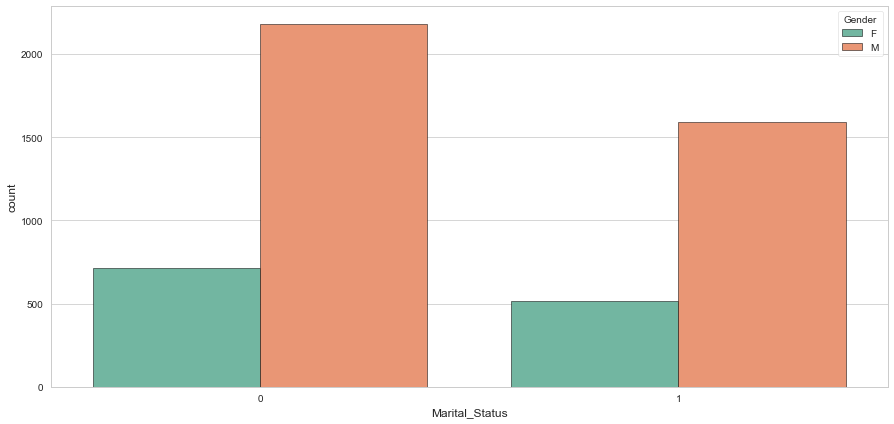

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.countplot(x=col, data=data, hue='Gender', palette='Set2', edgecolor='black', order=value_counts.index)

###### 결혼 여부에 상관없이 남자의 소비량이 더 많음.

##### 7) Product_Category_1

In [116]:
get_unique_values(data, 'Product_Category_1')

Column "Product_Category_1" has 20 unique categroies
------------------------------------------
5
7
1
2
3
8
16
14
10
19
11
12
4
17
15
6
13
20
18
9


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

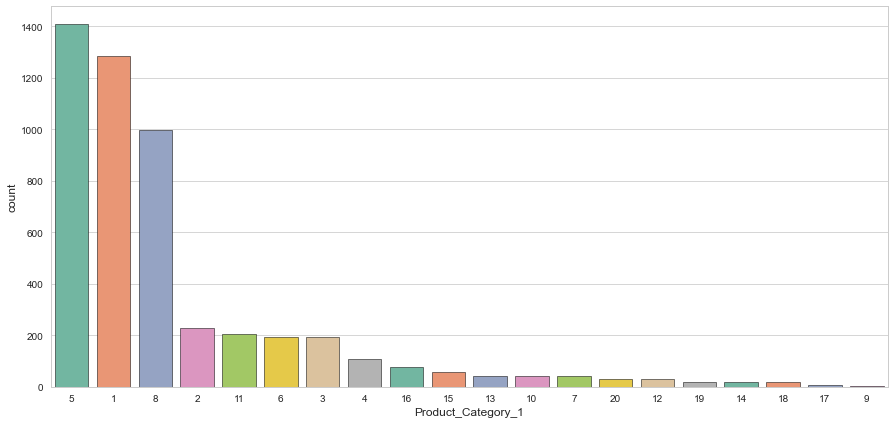

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
col = 'Product_Category_1'
value_counts = data[col].value_counts()
sns.countplot(x=col, data=data, palette='Set2', edgecolor='black', order=value_counts.index)

- 데이터가 숫자로 되어있어 어떤 물품 분류에 대한 소비인지 파악하기 힘들지만 5, 1, 8의 카테고리에 속하는 물품의 소비량이 압도적으로 높음.

##### 상품 대분류별 성별 보기 (Product_Category_1 vs Gender)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

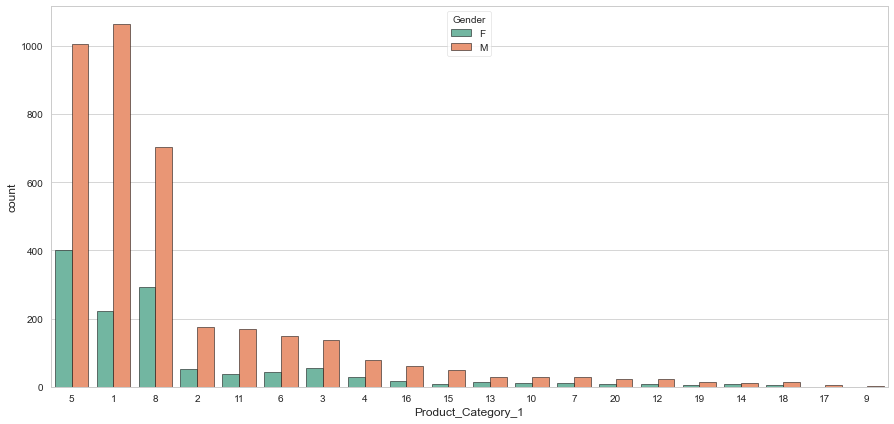

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.countplot(x=col, data=data, hue='Gender', palette='Set2', edgecolor='black', order=value_counts.index)

###### 1번 카테고리의 물품이 남녀간의 구매빈도 차이가 제일 많이남.

##### 8) Product_Category_2

In [119]:
get_unique_values(data, 'Product_Category_2')

Column "Product_Category_2" has 17 unique categroies
------------------------------------------
17.0
9.0
4.0
5.0
15.0
8.0
12.0
11.0
2.0
14.0
3.0
18.0
16.0
6.0
13.0
10.0
7.0


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

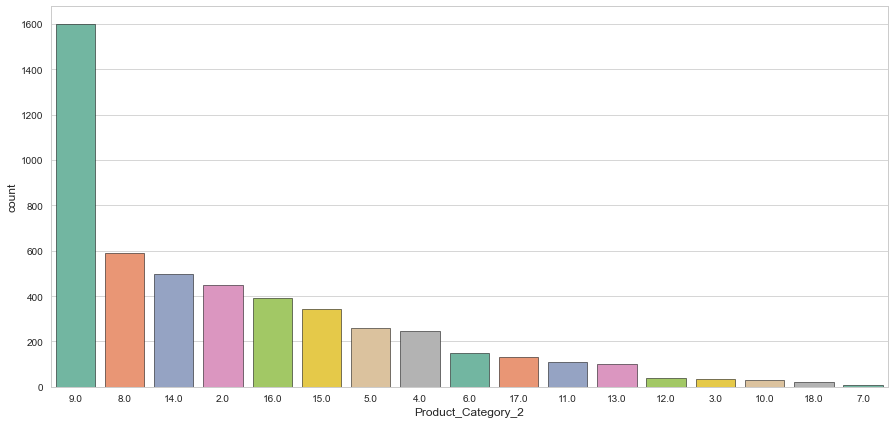

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
col = 'Product_Category_2'
value_counts = data[col].value_counts()
sns.countplot(x=col, data=data, palette='Set2', edgecolor='black', order=value_counts.index)

- 데이터가 숫자로 되어있어 어떤 물품 분류에 대한 소비인지 파악하기 힘들지만 9번 중분류 물품에 대한 소비가 압도적임.

##### 상품 대분류별 성별 보기 (Product_Category_1 vs Gender)

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

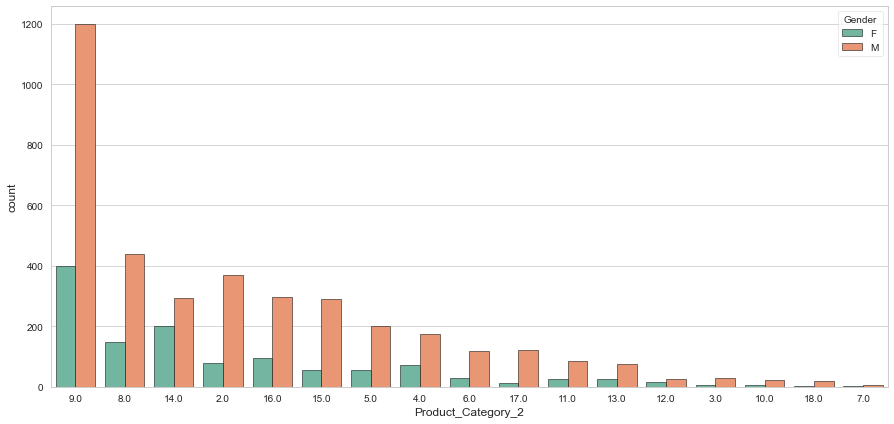

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.countplot(x=col, data=data, hue='Gender', palette='Set2', edgecolor='black', order=value_counts.index)

###### 9번 중분류 물품이 남녀 불문하고 가장 많이 구매.

### 모델링 (Modeling)

In [122]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1001088,P000,F,0-17,10,A,3,0,5,17.0,2010
1,1004493,P003,F,0-17,10,A,1,0,7,9.0,4483
2,1005302,P000,F,0-17,10,A,1,0,1,4.0,7696
3,1001348,P001,F,0-17,10,A,3,0,2,4.0,16429
4,1001348,P001,F,0-17,10,A,3,0,3,5.0,5780


In [123]:
# User_ID는 분석에 필요한 데이터가 아니므로 삭제
data = data.drop('User_ID', axis = 1)

In [126]:
# Feature, Label 분리
y = data['Gender']
X = data.drop("Gender", axis = 1)

In [138]:
# 타깃변수 Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [158]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

# stratify 옵션을 통해 타깃 변수의 비율을 유지하며 train-test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                   shuffle = True,
                                                   random_state = 1015,
                                                   stratify = y)

X_train.reset_index(drop = True, inplace=True)
X_test.reset_index(drop = True, inplace=True)

In [159]:
# 비율 확인
print("Train 데이터 내 레이블 1의 비율 : {:.3f}".format(np.sum(y_train) / len(y_train)))
print("Test 데이터 내 레이블 1의 비율 : {:.3f}".format(np.sum(y_test) / len(y_test)))

Train 데이터 내 레이블 1의 비율 : 0.753
Test 데이터 내 레이블 1의 비율 : 0.753


- 확인 결과 F => 0, M => 1로 label encoding이 됐음을 확인.

#### Preprocessing

In [168]:
cat_columns = [c for (c, t) in zip(X.dtypes.index, X.dtypes) if t == 'O'] 
num_columns = [c for c in X.columns if c not in cat_columns]

print('Categorical Columns: \n{}\n\n Numeric Columns: \n{}\n'.format(cat_columns, num_columns))

Categorical Columns: 
['Product_ID', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']

 Numeric Columns: 
['Purchase']



###### Scaling
- 거리기반 알고리즘인 KNN은 척도에 민감하므로 Scaling 해주기
- Train의 정보로 Test 스케일링.

In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in num_columns:
    X_train.loc[:, col] = scaler.fit_transform(np.array(X_train[col]).reshape(-1, 1))
    X_test.loc[:, col] = scaler.transform(np.array(X_test[col]).reshape(-1, 1))

###### One-Hot Encoding
- 모델의 학습 통일성을 위해서 데이터를 합쳐서 인코딩 진행

In [193]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)

X_all = pd.concat([X_train, X_test], axis = 0).reset_index(drop=True)

ohe.fit(X_all[cat_columns])

OneHotEncoder(sparse=False)

In [194]:
new_X = ohe.transform(X_all[cat_columns])

ohe_columns = ohe.categories_[0].tolist()

for idx in range(len(ohe.categories_)-1):
    ohe_columns += ohe.categories_[idx+1].tolist()
    
len(ohe_columns)

80

In [195]:
X_cat = pd.DataFrame(new_X, columns = ohe_columns)
X_cat.head()

,P000,P001,P002,P003,P009,0-17,18-25,26-35,36-45,46-50,...,17.0,18.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


###### 기존 범주형 변수를 제거, One-Hot Encoding된 변수 추가

In [197]:
X_all.drop(columns=cat_columns, inplace=True)

X = pd.concat([X_all, X_cat], axis = 1)

In [199]:
# train, test 데이터 분리
X_train = X.iloc[:X_train.shape[0], :]
X_test = X.iloc[X_train.shape[0]:, :]

In [200]:
X_train.shape, X_test.shape

((3998, 81), (1000, 81))

##### KNN

###### Hyperparameter 조정 X

In [201]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Test Score : {:.3f}".format(knn.score(X_test, y_test)))

Test Score : 0.746


In [203]:
results = knn.predict(X_test)
results

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [204]:
pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total')

Predicted,0,1,total
Real,,,
0,57,190,247
1,64,689,753
total,121,879,1000


###### 대체로 label 0(F)을 잘 예측하고 있지 못함.

#### 평가

In [209]:
np.unique(y_test).tolist()

[0, 1]

In [213]:
from sklearn import metrics
print(metrics.classification_report(y_test,results, digits=2))

              precision    recall  f1-score   support

           0       0.47      0.23      0.31       247
           1       0.78      0.92      0.84       753

    accuracy                           0.75      1000
   macro avg       0.63      0.57      0.58      1000
weighted avg       0.71      0.75      0.71      1000



### 최적의 K 찾기

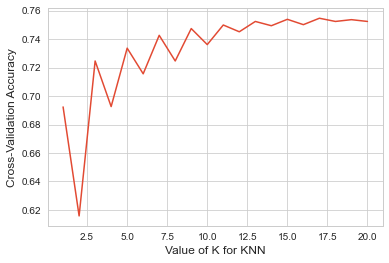

In [214]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1,21))           # k를 1~100까지 고려하여 최적의 k를 찾을 것이다.
k_score = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring = "accuracy")    # 10-fold cross-validation
    k_score.append(scores.mean())                    # 10-fold 각각 정확도의 평균으로 성능계산

plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

- K값을 높이면 높일수록 성능은 오르지만 모델의 복잡도 측면에서 좋지 못한 선택인듯 함.
- 극적으로 오르는것이 아니고 0.76정도에 수렴하는듯한 모습.

###### 성능 향상을 위한 다른 방안 : Threshold값 조절

In [234]:
# 0이라 예측할 확률을 저장

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_probs = knn.predict_proba(X_test)
y_probs1 = y_probs[:, 0]

###### Threshold(임곗값)에 따른 성능 비교

In [235]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 101)
acc = []

for t in thresholds:
    y_pred = y_probs1 <= t
    acc.append(accuracy_score(y_test, y_pred))
    
best_threshold = thresholds[np.argmax(acc)]

In [236]:
print("정확도는 임곗값이 t={0}일 때 {1:.2f}".format(best_threshold, acc[np.argmax(acc)] * 100))
print("임곗값이 0.5일 때 정확도는 {0:.2f}".format(acc[list(thresholds).index(0.5)] * 100))

정확도는 임곗값이 t=0.8일 때 75.40
임곗값이 0.5일 때 정확도는 74.60


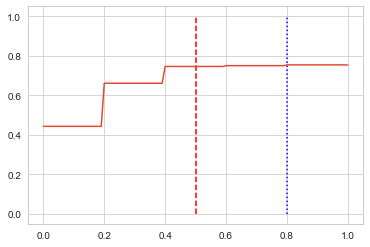

In [237]:
plt.plot(thresholds, acc)
plt.vlines(0.5, 0, 1, colors='r', linestyles='dashed')
plt.vlines(0.8, 0, 1, colors='b', linestyle='dotted')

###### 미미하지만 약 0.8정도 높은 accuracy를 얻을 수 있었음.